In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

billboard_hot_100 = pd.read_csv("billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

In [2]:
billboard_hot_100.dtypes

Unnamed: 0                        int64
first_day_of_the_week    datetime64[ns]
artist                           object
song_name                        object
position                          int64
last_week_position              float64
peak_position                     int64
weeks_on_chart                    int64
songwriters                      object
producers                        object
promotion_label                  object
dtype: object

In [3]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year

billboard_hot_100.head()

,Unnamed: 0,first_day_of_the_week,artist,song_name,position,last_week_position,peak_position,weeks_on_chart,songwriters,producers,promotion_label,year
0,0,1958-09-08,Domenico Modugno,Nel Blu Dipinto Di Blu (Volare),1,1.0,1,6,"F.Migliacci, D.Modugno",Not Listed,Decca,1958
1,1,1958-09-08,The Elegants,Little Star,2,2.0,1,6,"V.Picone, A.Venosa",Not Listed,Apt,1958
2,2,1958-09-08,The Everly Brothers,Bird Dog,3,3.0,3,6,B.Bryant,Not Listed,Cadence,1958
3,3,1958-09-08,Jimmy Clanton And His Rockets,Just A Dream,4,4.0,4,6,Not Listed,Not Listed,Ace,1958
4,4,1958-09-08,Perez Prado And His Orchestra,Patricia,5,6.0,2,6,"B.Marcus, P.Prado",Not Listed,RCA Victor,1958


## Song lifetime on chart

### By week

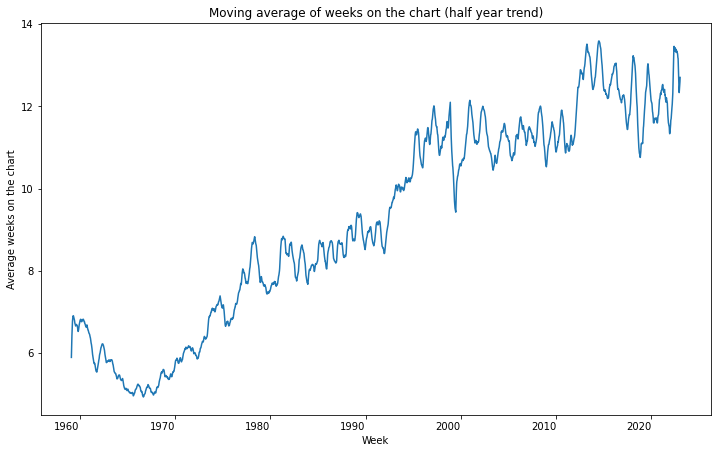

In [4]:
import matplotlib.dates as mdates

avg_weeks_on_chart = billboard_hot_100[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

avg_weeks_on_chart_plot = avg_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
plt.title("Moving average of weeks on the chart (half year trend)")
plt.xlabel("Week")
plt.ylabel("Average weeks on the chart")

plt.show()

### By year

In [5]:
max_weeks_on_chart_yearly = billboard_hot_100[["weeks_on_chart", "year"]]
avg_week_on_chart_yearly = billboard_hot_100[["weeks_on_chart", "year"]].groupby(by="year").mean().rolling(window=30).mean()

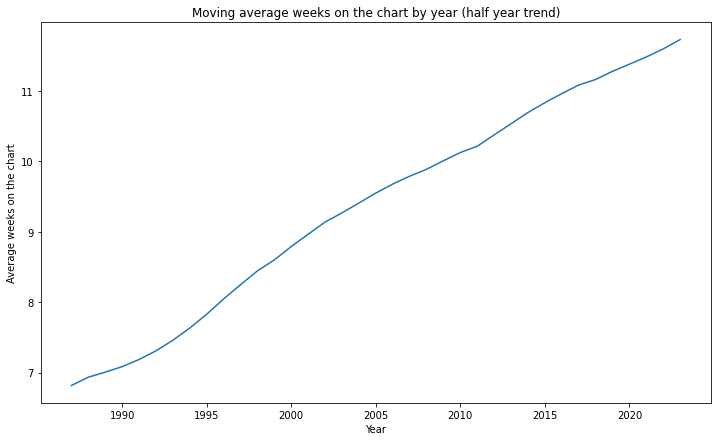

In [6]:
avg_weeks_on_chart_plot_yearly = avg_week_on_chart_yearly.plot(kind='line', figsize=(12, 7), legend=False)

plt.title("Moving average weeks on the chart by year (half year trend)")
plt.xlabel("Year")
plt.ylabel("Average weeks on the chart")

plt.show()

### Top 20 weekly

In [7]:
# max_weeks_on_chart = billboard_hot_100[["artist", "song_name", "weeks_on_chart"]].groupby(
#     by=["artist", "song_name"]).max()

top_20_weekly = billboard_hot_100[["first_day_of_the_week",
                                   "position", "weeks_on_chart"]][billboard_hot_100["position"] <= 20].sort_values(by=[
                                                                "first_day_of_the_week", "weeks_on_chart"]).groupby(
                                                                by=["first_day_of_the_week"]).head(20)

#top_20_weekly = pd.merge(max_weeks_on_chart.reset_index(), top_20_weekly, on=["artist", "song_name"])

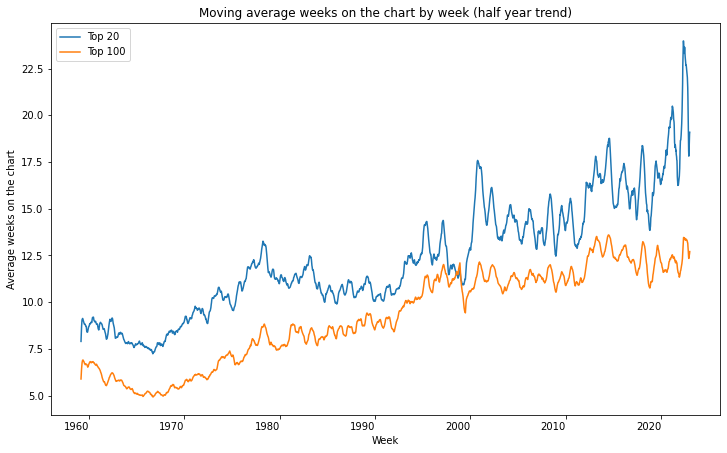

In [8]:
top_20_on_chart_avg = top_20_weekly[["first_day_of_the_week", "weeks_on_chart"]].groupby(
    by="first_day_of_the_week").mean().rolling(window=30).mean()

top_20_on_chart_avg_plot = top_20_on_chart_avg.plot(kind='line', figsize=(12, 8), legend=False, rot=0)
avg_weeks_on_chart.plot(kind='line', figsize=(12, 8), legend=False, rot=0, ax=top_20_on_chart_avg_plot)

plt.title("Moving average weeks on the chart by week (half year trend)")
plt.xlabel("Week")
plt.ylabel("Average weeks on the chart")
plt.legend(["Top 20", "Top 100"])

plt.show()

## Distribution of lifetime of the songs

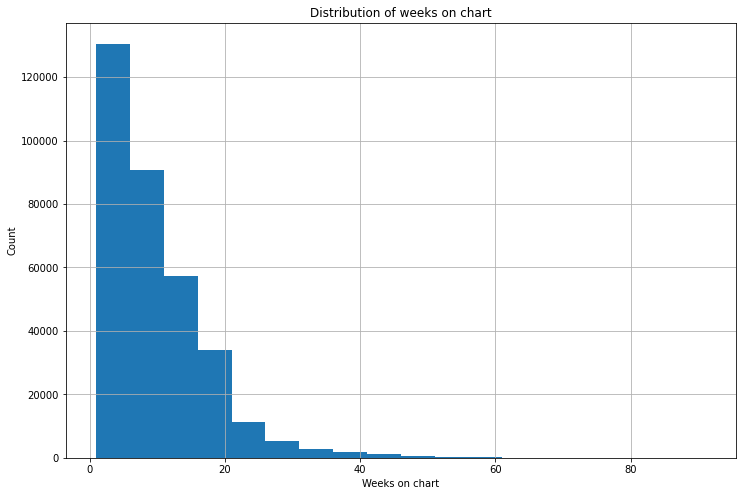

In [9]:
weeks_on_chart_counts = billboard_hot_100["weeks_on_chart"]#.value_counts()

# choosing bin size: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
weeks_on_chart_counts.hist(bins=18, figsize=(12, 8), legend=False)
plt.title("Distribution of weeks on chart")
plt.xlabel("Weeks on chart")
plt.ylabel("Count")

plt.show()

## New songs on the charts

### By week

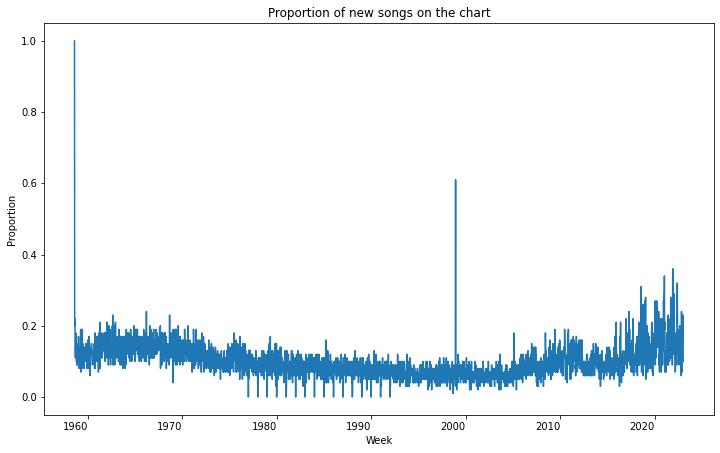

In [43]:
billboard_hot_100["new_song"] = billboard_hot_100["last_week_position"].map(
    lambda position: True if np.isnan(position) else False)

cross_tab_songs = billboard_hot_100[["first_day_of_the_week", "new_song"]].groupby(by="first_day_of_the_week").mean()
cross_tab_songs.plot(kind="area", figsize=(12, 8), legend=False, rot=0)

plt.title("Proportion of new songs on the chart")
plt.xlabel("Week")
plt.ylabel("Proportion")
#plt.xticks(rotation = 45)
#plt.legend(loc="upper right", ncol=2)

# for label in cross_tab_songs_plot.xaxis.get_ticklabels():
#     label.set_visible(False)

# for n, x in enumerate([*cross_tab_songs.index.values]):
#     for (i, proportion) in enumerate(cross_tab_songs.loc[x]):
#         plt.text(x=n - 0.5,
#                  y=proportion / 2 if i == 0 else (1 - proportion) + proportion / 2,
#                  s=f'{np.round(proportion * 100, 1)}%', 
#                  color="black",
#                  fontsize=6,
#                  fontweight="bold")

plt.show()

### By year

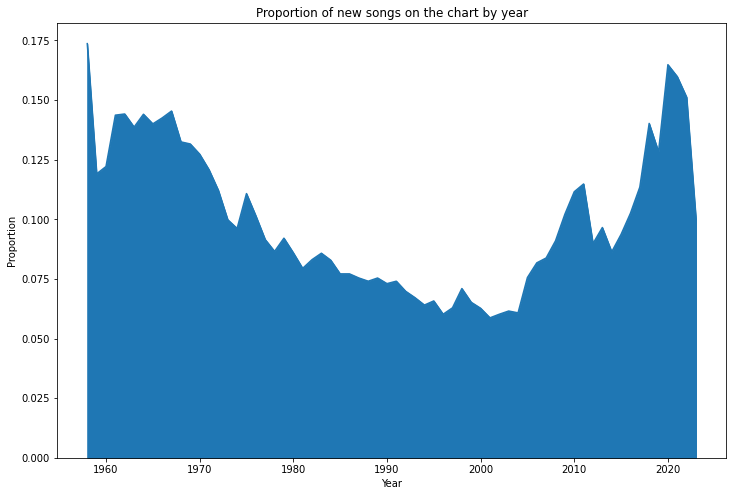

In [11]:
cross_tab_songs_yearly = billboard_hot_100[["year", "new_song"]].groupby(by="year").mean()
cross_tab_songs_yearly.plot(kind="area", figsize=(12, 8), legend=False, rot=0)

plt.title("Proportion of new songs on the chart by year")
plt.xlabel("Year")
plt.ylabel("Proportion")

plt.show()

## Weekly differences in positions

In [33]:
def calculate_position_change(position, last_week_position):
    if np.isnan(last_week_position):
        return 0
    if position > last_week_position:
        return 1
    return 0

billboard_hot_100["position_rised"] = billboard_hot_100.apply(
    lambda x: calculate_position_change(x["position"], x["last_week_position"]), axis=1)

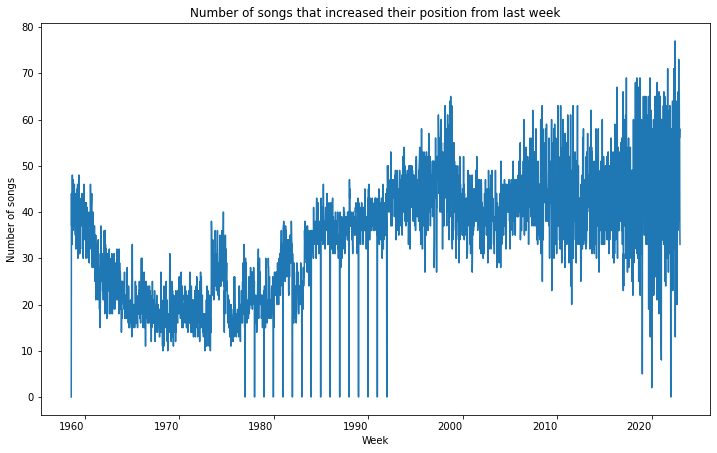

In [36]:
count_rises = billboard_hot_100[["position_rised", "first_day_of_the_week"]].groupby(by="first_day_of_the_week").sum()

count_rises.plot(kind='line', figsize=(12, 8), legend=False, rot=0)

plt.title("Number of songs that increased their position from last week")
plt.xlabel("Week")
plt.ylabel("Number of songs")
plt.show()

In [37]:
def calculate_position_change(position, last_week_position):
    if np.isnan(last_week_position):
        return position
    return position - last_week_position

billboard_hot_100["position_change"] = billboard_hot_100.apply(
    lambda x: calculate_position_change(x["position"], x["last_week_position"]), axis=1)

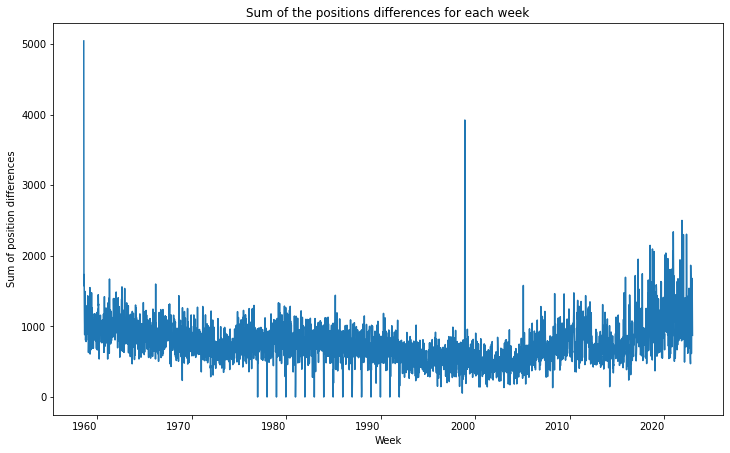

In [42]:
count_changes = billboard_hot_100[["position_change", "first_day_of_the_week"]].groupby(by="first_day_of_the_week").sum()

count_changes.plot(kind='line', figsize=(12, 8), legend=False, rot=0)

plt.title("Sum of the positions differences for each week")
plt.xlabel("Week")
plt.ylabel("Sum of position differences")
plt.show()

## Best perfoming songs

In [ ]:
max_weeks_on_chart = billboard_hot_100[["artist", "song_name", "weeks_on_chart"]].groupby(
    by=["artist", "song_name"]).max()
max_weeks_on_chart_sorted = max_weeks_on_chart.sort_values(by="weeks_on_chart", ascending=False).reset_index()

max_weeks_on_chart_sorted.head(10).style

## Best songwriters

In [ ]:
songs_with_songwriters = billboard_hot_100[billboard_hot_100["songwriters"] != "Not Listed"]

songwriters_songs_count = songs_with_songwriters.groupby(by=["songwriters", "artist", "song_name"]).size().groupby(
    by="songwriters").count().sort_values(ascending=False).reset_index(name="songs_count")
songwriters_songs_count.head(10).style